In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as si

# define our x for plotting purposes
x = np.linspace(0, 1, 1000)

def func(x):
    return np.sin(x)

true_area = 2
end = np.pi

In [2]:
# Midpoint rule
def midpoint_rule(a, b, function, number_intervals=10):
    " a and b = end points for interval"
    "'function' is the function of x in [a,b]"
    "number_intervals = number of subintervals we split [a,b] into"
    "Returns the integral of function(x) over [a,b]"

    interval_size = (b - a)/number_intervals

    " assert checks whether statement is 'true', and if 'false' raises an 'AssertionError' w optional message"
    " eg assert x == 10, 'x should be equal to 10'"
    
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# Now let's test the midpoint function by varying no. of rectangles
print("The exact area found by direct integration = %g" % true_area)
rect_no = []
errors_rect = []
for i in (1, 2, 4, 8, 16, 32, 100, 1000):
    area = midpoint_rule(0, end, func, i)
    error = abs(area-true_area)
    rect_no.append(i)
    errors_rect.append(error)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-true_area)))


The exact area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 4 rectangle(s) = 2.05234 (error=0.0523443)
Area 8 rectangle(s) = 2.01291 (error=0.0129091)
Area 16 rectangle(s) = 2.00322 (error=0.00321638)
Area 32 rectangle(s) = 2.0008 (error=0.000803416)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


In [3]:
# Trapezoid rule

def trapezoidal_rule(a, b, function, number_intervals=10):
    # see the composite implementation in the homework for a more efficient version
    " a and b = end points for interval"
    "'function' is the function of x in [a,b]"
    "number_intervals = number of subintervals we split [a,b] into"
    "Returns the integral of function(x) over [a,b]"

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    for i in range(number_intervals):
        x_value = a + (i * interval_size)
        a_plus_b = function(x_value + interval_size) + function(x_value)
        I_T += 0.5 * interval_size * a_plus_b

    # Return our running total result
    return I_T

trap_no = []
errors_trap = []

print("The exact area found by direct integration = %g" % true_area)
for i in (1, 2, 4, 8, 16, 32, 100, 1000):
    area = trapezoidal_rule(0, end, func, i)
    error = abs(area-true_area)
    trap_no.append(i)
    errors_trap.append(error)
    print("Area %d trapezoid(s) = %g (error=%g)"%(i, area, abs(area-true_area)))

The exact area found by direct integration = 2
Area 1 trapezoid(s) = 1.92367e-16 (error=2)
Area 2 trapezoid(s) = 1.5708 (error=0.429204)
Area 4 trapezoid(s) = 1.89612 (error=0.103881)
Area 8 trapezoid(s) = 1.97423 (error=0.0257684)
Area 16 trapezoid(s) = 1.99357 (error=0.00642966)
Area 32 trapezoid(s) = 1.99839 (error=0.00160664)
Area 100 trapezoid(s) = 1.99984 (error=0.000164496)
Area 1000 trapezoid(s) = 2 (error=1.64493e-06)


In [4]:
# Simpsons rule

def simpsons_rule(a, b, func, number_intervals=10):
    # This is different to the function/implementation available with SciPy  
    # where discrete data only is passed to the function. 
    
    # Bear this in mind when comparing results - there will be a factor of two
    # n the definition of "n" we need to be careful about!
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    for i in range(number_intervals):
        x = a + (i * interval_size)
        x_h = x + interval_size
        c = x + (interval_size / 2)
        I_S += ((x_h-x) / 6) * (func(x) + 4*func(c) + func(x_h))


    return I_S

simp_no = []
simp_error = []

print("The area found by direct integration = %g" % true_area)

for i in (1, 2, 4, 8, 16, 32, 100, 1000):
    area = simpsons_rule(0, end, func, i)
    error = abs(area - true_area)
    simp_no.append(i)
    simp_error.append(error)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area - true_area)))

The area found by direct integration = 2
Area 1 rectangle(s) = 2.0944 (error=0.0943951)
Area 2 rectangle(s) = 2.00456 (error=0.00455975)
Area 4 rectangle(s) = 2.00027 (error=0.00026917)
Area 8 rectangle(s) = 2.00002 (error=1.6591e-05)
Area 16 rectangle(s) = 2 (error=1.03337e-06)
Area 32 rectangle(s) = 2 (error=6.453e-08)
Area 100 rectangle(s) = 2 (error=6.7647e-10)
Area 1000 rectangle(s) = 2 (error=4.21885e-14)


In [11]:
# Weddle's rule

# Composite simpson
"uses function evaluations at (number_intervals + 1) points"
def composite_simp_rule(a, b, func, number_intervals):
    interval_size = (b - a)/number_intervals

    assert interval_size > 0, "interval_size < 0"
    assert type(number_intervals) == int, "number_intervals not int"
    assert number_intervals % 2 == 0, "number_intervals is not even"
    
    # start with the two end member values
    I_cS2 = func(a) + func(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * func(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * func(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

comp_weddle_no = []
comp_weddle_error = []

def weddle_rule(a, b, func, number_intervals=10):
    interval_S2 = 2*number_intervals
    S = composite_simp_rule(a, b, func, number_intervals)
    S2 = composite_simp_rule(a, b, func, interval_S2)

    return S2 + (S2 - S)/15.
    
print("The area found by direct integration = %g" % true_area)

for i in (2, 4, 8, 16, 32, 100, 1000):
"cant take i = 1"
    area = weddle_rule(0, end, func, i)
    error = abs(area - true_area)
    comp_weddle_no.append(i)
    comp_weddle_error.append(error)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area - true_area)))


The area found by direct integration = 2
Area 2 rectangle(s) = 1.99857 (error=0.00142927)
Area 4 rectangle(s) = 1.99998 (error=1.68691e-05)
Area 8 rectangle(s) = 2 (error=2.47545e-07)
Area 16 rectangle(s) = 2 (error=3.80916e-09)
Area 32 rectangle(s) = 2 (error=5.92928e-11)
Area 100 rectangle(s) = 2 (error=6.23945e-14)
Area 1000 rectangle(s) = 2 (error=8.88178e-16)


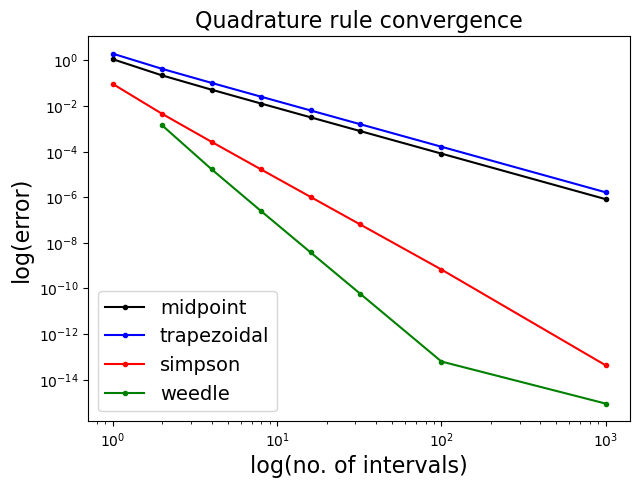

In [13]:
## Log-log plot
fig = plt.figure(figsize=(7, 5))
ax1 = plt.subplot(111)

ax1.set_title('Quadrature rule convergence', fontsize=16)
ax1.set_xlabel('log(no. of intervals)', fontsize=16)
ax1.set_ylabel('log(error)', fontsize=16)

# plotting
" log-log plot"
ax1.loglog(rect_no, errors_rect, 'k.-', label = 'midpoint')
ax1.loglog(trap_no, errors_trap, 'b.-', label = 'trapezoidal')
ax1.loglog(simp_no, simp_error, 'r.-', label = "simpson")
ax1.loglog(comp_weddle_no, comp_weddle_error, 'g.-', label = "weedle")

ax1.legend(loc='best', fontsize=14)